In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100)
X[:4]

array([0.45740997, 0.06069027, 0.27937965, 0.51275221])

In [3]:
y = 5.5 * X + 4.5
y[:4]

array([7.01575485, 4.83379647, 6.03658807, 7.32013715])

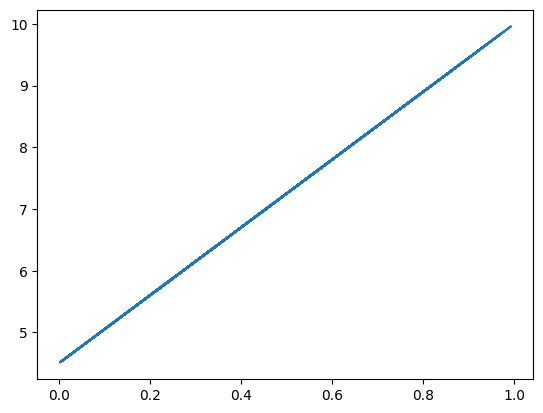

In [4]:
plt.plot(X, y)

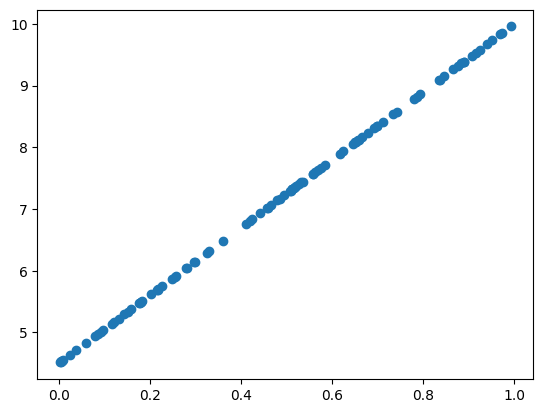

In [5]:
plt.scatter(X, y)

In [6]:
noise = np.random.normal(0, 0.1, 100)
y = 5.5 * X + 4.5 + noise
y[:4]

array([6.95520639, 4.8223978 , 6.2428769 , 7.36755324])

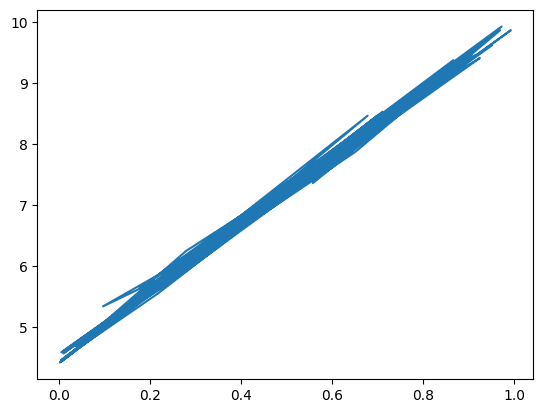

In [7]:
plt.plot(X, y)

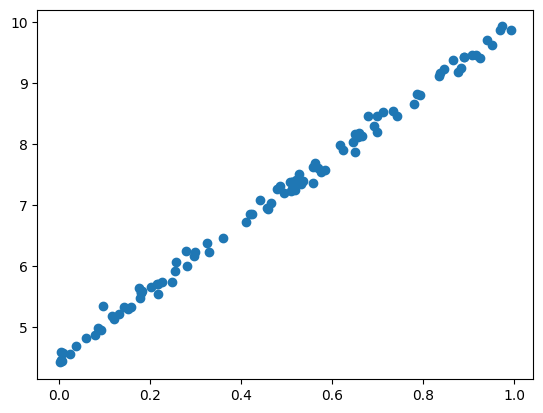

In [8]:
plt.scatter(X, y)

In [9]:
X = np.random.rand(100)
noise = np.random.normal(0, .1, 100)
y = 5.5 * X + 4.5 + noise
X = X.reshape(-1, 1)
X.shape

(100, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
model.coef_, model.intercept_

(array([5.45653954]), np.float64(4.5180263974926484))

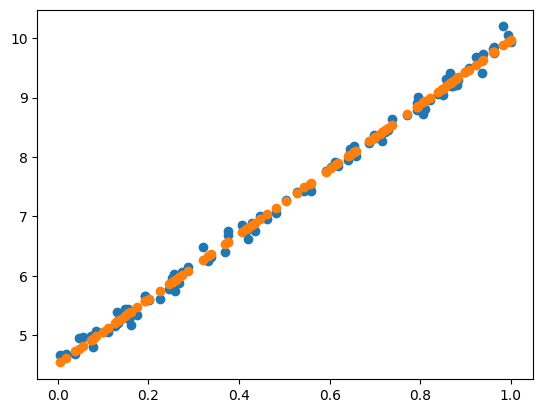

In [13]:
plt.scatter(X, y)
plt.scatter(X, model.predict(X))

### Linear Regression from Scratch

In [28]:
class myLinearRegressionModel:
    def __init__(self):
        self.params = {}
        self.params['w'] = 0
        self.params['b'] = 0



    def predict(self, X):
        y_hat = self.params['w'] * X + self.params['b']
        y_hat = y_hat.flatten()
        return y_hat
        

    def calculateGradient(self, X, y, y_hat):
        dw = np.mean((y_hat - y) * X)
        db = np.mean(y_hat - y)

        derivative = {
            'dw' : dw,
            'db' : db
        }

        return derivative
    
    
    def loss(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)


    def fit(self, X, y, epochs=100, lr=0.1):
        
        self.stats = {
            'epochs' : epoch,
            'loss' : loss
        }

        for epoch in range(epochs):
            # print(f'In {epoch} th epoch')
            y_hat = self.predict(X)
            derivative = self.calculateGradient(X, y, y_hat)
            self.params['w'] = self.params['w'] - lr * derivative['dw']
            self.params['b'] = self.params['b'] - lr * derivative['db']
        
        _loss = self.loss(y, y_hat)
        self.stats['epochs'].append(epoch)
        self.stats['loss'].append(loss)
    

myModel = myLinearRegressionModel()
# print(myModel.params)

# y_hat = myModel.predict(np.array([
#     [1],
#     [2]
# ]))

# y_hat

# myModel.fit(X, y)
# myModel.predict(X)

myModel.fit(X, y, epochs=10000)
print()

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1810556739.py, line 27)

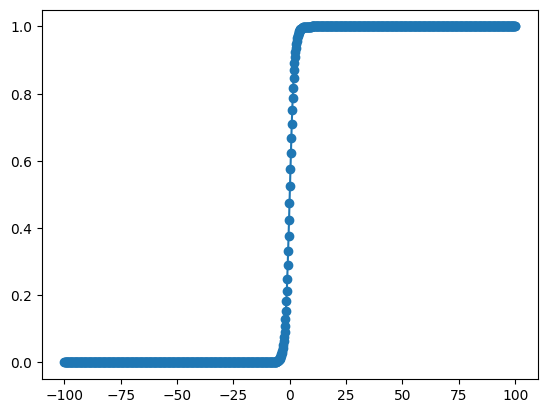

In [33]:
X = np.linspace(-100, 100, 1000)
y = 1 / (1 + np.exp(- X))

plt.plot(X, y)
plt.scatter(X, y)